In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
import corner
from matplotlib.backends.backend_pdf import PdfPages
outdir = '/Users/christof/dstrf/output/'
sns.set_context("paper", font_scale=0.7)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['xtick.major.size'] = 1.5
plt.rcParams['ytick.major.size'] = 1.5
plt.rcParams["figure.figsize"] = (3.5, 6.5)
est_clr = ["#148B8B", "#D9A522"]

In [2]:
os.chdir('/Users/christof/dstrf/TimePeakDistortionFigures')
timedistort = pd.read_csv('TimePeak.csv',header=None)
filters = pd.read_csv('../config/hg_filters.csv')

In [3]:
timedistort = timedistort.rename(columns={0:"True_Max_Freq",
                            1:"Expected_Max_Freq",
                            2:"Estimated_Max_Freq",
                            3:"True_Pwr_Diff",
                            4:"Expected_Pwr_Diff",
                            5:"Estimated_Pwr_Diff",
                            6:"True_Bandpass",
                            7:"Expected_Bandpass",
                            8:"Estimated_Bandpass",
                            9:"RF",
                            10:"Model"})

timedistort = pd.merge(timedistort,filters,on = 'RF')

In [4]:
timedistort["delta_l"] = timedistort['True_Bandpass']-timedistort['Estimated_Bandpass']
data = timedistort[["Model","RF","Pt","delta_l"]]
data["pt"] = data["Pt"]
offset = -0.2
for i in range(len(data["Pt"])):
        if data["Model"][i] == "phasic":
            data["pt"][i] = data["Pt"][i]-offset
        else:
            data["pt"][i] = data["Pt"][i]+offset

/anaconda3/envs/dstrf/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/dstrf/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/envs/dstrf/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [5]:
#Seperates by Model
phasic = data["Model"] == "phasic"
tonic = data["Model"] == "tonic"

#Seperates the types by rotation parameter

phasic_0 = (data["Model"]=="phasic")&(data["Pt"]==0)
phasic_pi2 = (data["Model"]=="phasic")&(data["Pt"]!=0)

tonic_0 = (data["Model"]=="tonic")&(data["Pt"]==0)
tonic_pi2 = (data["Model"]=="tonic")&(data["Pt"]!=0)

#Gets the mean of Exp-Est_freq by phi parameter

ph_0 = np.mean(data[phasic_0]["delta_l"])
ph_pi2 = np.mean(data[phasic_pi2]["delta_l"])

tc_0 = np.mean(data[tonic_0]["delta_l"])
tc_pi2 = np.mean(data[tonic_pi2]["delta_l"])

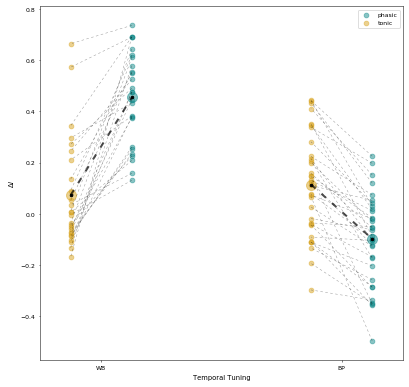

In [7]:
plt.close()
fig, ax = plt.subplots()
ax.set(xlabel='Temporal Tuning',ylabel='$\Delta l$')

#Plot phasic delta_l and means
ax.scatter(data[:]["Pt"][phasic]-offset,data[:]["delta_l"][phasic],alpha=0.5,label="phasic",color=est_clr[0])
#ax.plot([-offset,(np.pi/2)-offset],[ph_0,ph_pi2],linestyle="--",dashes=(5,5),linewidth = 2,color=est_clr[0])
ax.plot([-offset], [ph_0], marker='o', markersize=10, color=est_clr[0],alpha = 0.5)
ax.plot([-offset], [ph_0], marker='.', markersize=5, color="black")
ax.plot([(np.pi/2)-offset], [ph_pi2], marker='o', markersize=10, color=est_clr[0],alpha = 0.5)
ax.plot([(np.pi/2)-offset], [ph_pi2], marker='.', markersize=5, color="black")

#Plot tonic delta_l and means
ax.scatter(data[:]["Pt"][tonic]+offset,data[:]["delta_l"][tonic],alpha=0.5,label="tonic",color=est_clr[1])
#ax.plot([offset,(np.pi/2)+offset],[tc_0,tc_pi2],linestyle="--",dashes=(5,5),linewidth = 2, color=est_clr[1])
ax.plot([offset], [tc_0], marker='o', markersize=10, color=est_clr[1],alpha = 0.5)
ax.plot([offset], [tc_0], marker='.', markersize=5, color="black")
ax.plot([(np.pi/2)+offset], [tc_pi2], marker='o', markersize=10, color=est_clr[1],alpha = 0.5)
ax.plot([(np.pi/2)+offset], [tc_pi2], marker='.', markersize=5, color="black")

#Means by phase
ax.plot([offset,-offset],[tc_0,ph_0],
        linestyle = "--",dashes = (3,4),linewidth = 2, color = "black", alpha = 0.7)
        
ax.plot([(np.pi/2)+offset,(np.pi/2)-offset],[tc_pi2,ph_pi2],
        linestyle = "--",dashes = (3,4),linewidth = 2, color = "black", alpha = 0.7)
#Plot repeated measures data
for i in range(59):
    x1,x2 = data.loc[data["RF"]==i+1]["pt"]
    y1,y2 = data.loc[data["RF"]==i+1]["delta_l"]
    ax.plot([x1,x2],[y1,y2],linestyle="--",dashes=(5,5),color="black",alpha=0.4)

#Figure Params
plt.legend(loc="upper right")
ax.set_xlim([2*offset,(np.pi/2)-2*offset])
plt.setp(ax, xticks=[0,np.pi/2], xticklabels=['WB','BP'])
fig.set_figwidth(6.5)
fig.set_figheight(6.5)
plt.savefig(os.path.join(outdir, "delta_l.pdf"))